Hopfield Networks are networks with memory based on weights.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as r

In [80]:
# function for returning the weights corresponding to a memory vector
def weights(memory_vector):
    w = np.outer(memory_vector,memory_vector)
    for i in range(len(memory_vector)):
        w[i][i] = 0
    return w

In [81]:
# single updation
def update(vector,w):
    L = len(vector)
    index = r.randint(0,L)
    new_val = np.dot(w[index],vector)
    vector[index] = np.sign(new_val)
    return vector

In [82]:
# running the Hopfield network for 'N' steps
def Hopfield(vector_ini,w,N):
    vector_arr = []
    vector = np.array(vector_ini)
    vector_arr.append(vector.copy())
    for i in range(N):
        vector = update(vector,w)
        vector_arr.append(vector.copy())
    return np.array(vector_arr)

In [83]:
# this function reshapes the vector into a square matrix if poosible
def reshape(vector):
    L = len(vector)
    L_sq = int(L**0.5)
    return np.reshape(vector,(L_sq,L_sq))

In [84]:
# preparing the desired memory image

# image 1 : 'one'
one = np.array([
    [0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0,0],
    [0,0,0,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0],
])

one = one*2-1

Target Memory Image


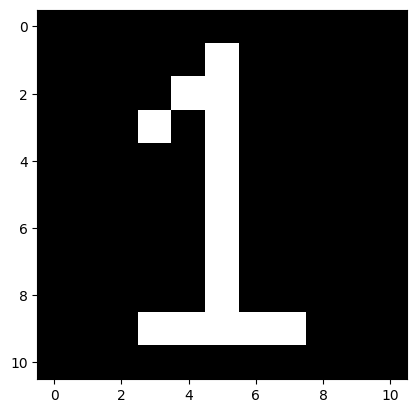

In [85]:
img = one
print('Target Memory Image')
plt.imshow(img,cmap='gray')
plt.show()

In [86]:
# preparing the netork weights
w = weights(img.flatten())

In [87]:
# running the network
vector_ini = r.randint(0,2,size = len(img.flatten()))
vector_ini = 2*vector_ini-1
N = 550
vector_arr = Hopfield(vector_ini,w,N)

Initial Image


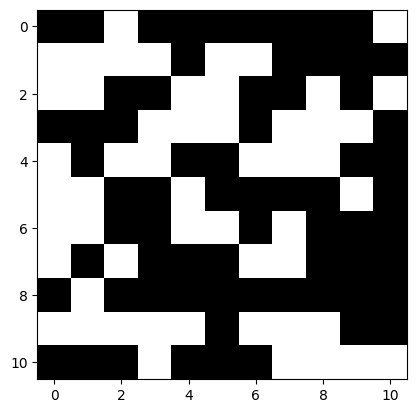

In [88]:
print('Initial Image')
plt.imshow(np.reshape(vector_arr[0],(len(img),len(img))),cmap = 'gray')
plt.show()

Final Image


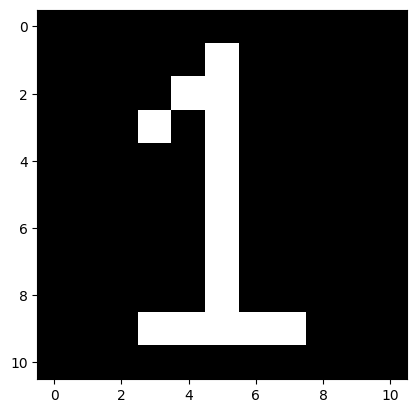

In [89]:
print('Final Image')
plt.imshow(np.reshape(vector_arr[-1],(len(img),len(img))),cmap = 'gray')
plt.show()

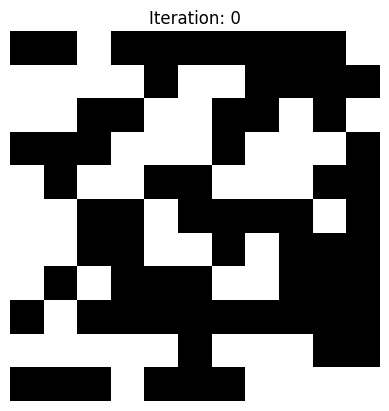

In [90]:
# animation
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
img = ax.imshow(reshape(vector_arr[0]), cmap='gray')
ax.axis('off')

def animate(i):
    img.set_data(reshape(vector_arr[i]))
    ax.set_title(f"Iteration: {i}")
    return [img]

ani = FuncAnimation(
    fig,
    animate,
    frames=len(vector_arr),
    interval=5,
    blit=True
)

plt.show()

In [ ]:
# saving the animation
# ani.save('hopfield_one.gif', writer='pillow', fps=30)